<a href="https://colab.research.google.com/github/sudhrathore/sudhanshu_AIMLBootcamp_Genzeon_2023/blob/main/AIMLDay2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#gradient descent algo
import pandas as pd
df=pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [5]:
data=[0.2,0.4,0.6,0.8]
df=pd.DataFrame(data,columns=['Bacteria_size'])
df

,Bacteria_size
0,0.2
1,0.4
2,0.6
3,0.8


In [6]:
df['Max_Growth']=[3.4,3.8,4.2,4.6]

In [7]:
df

,Bacteria_size,Max_Growth
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.6


In [8]:
#split
x_train=df.iloc[:3,:-1]
y_train=df.iloc[:3,-1:]
x_test=df.iloc[3:,:-1]
y_test=df.iloc[3:,-1:]

In [12]:
x_train['Bacteria_size'][0]

0.2

In [10]:
y_train

,Max_Growth
0,3.4
1,3.8
2,4.2


In [17]:
import sympy as sym

In [46]:
#step1:initialize model params
mi=1
ci=-1
n=0.1
epochs=10

MSE=[]

#step2 -start iteration
for iter in range(1,epochs+1):
  print("Iteration : {}".format(iter))
  print("+++++++++++++++++++++++")
  #step3 - iterate samples
  for sample in range(0,len(x_train)):
    xa=x_train['Bacteria_size'][sample]
    ya=y_train['Max_Growth'][sample]
    print("---->Sample {}".format(sample+1)+" x={}".format(xa)+" y={}".format(ya))

    #step 4:Compute Gradient (to know how Error rate is affected w.r.to m,c)
    x=sym.Symbol('x')
    y=sym.Symbol('y')
    m=sym.Symbol('m')
    c=sym.Symbol('c')

    E=(0.5)*(y-m*x-c)**2 #HMSE equation

    #so as to substitute values into equation,
    #we need to explicitly tell python control that vars are symbols

    deltaE_m=sym.diff(E,m)
    deltaE_c=sym.diff(E,c)
    print(deltaE_m)
    print(deltaE_c)

    #subtitute the values in deltaE_m
    deltaE_m=deltaE_m.subs(m,mi)
    deltaE_m=deltaE_m.subs(c,ci)
    deltaE_m=deltaE_m.subs(x,xa)
    deltaE_m=deltaE_m.subs(y,ya)

    #subtitute the values in deltaE_m
    deltaE_c=deltaE_c.subs(m,mi)
    deltaE_c=deltaE_c.subs(c,ci)
    deltaE_c=deltaE_c.subs(x,xa)
    deltaE_c=deltaE_c.subs(y,ya)

    print("Obtained Gradient wrto m and c: ")
    print('deltaE_m: ',deltaE_m)
    print('deltaE_c: ',deltaE_c)

    #step5:Calculate step length - change
    del_m=-n*deltaE_m
    del_c=-n*deltaE_c

    #step6:Updating the model params
    mi=mi+del_m
    ci=ci+del_c

    print("m:{}".format(mi)+"c:{}".format(ci))

  E=E.subs(m,mi)
  E=E.subs(c,ci)
  E=E.subs(x,xa)
  E=E.subs(y,ya)
  print("Error: ",E)
  MSE.append(E)
  print(MSE)
  print("------------------------------------")

print("Optimal_params:")
print(mi)
print(ci)





Iteration : 1
+++++++++++++++++++++++
---->Sample 1 x=0.2 y=3.4
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
Obtained Gradient wrto m and c: 
deltaE_m:  -0.840000000000000
deltaE_c:  -4.20000000000000
m:1.08400000000000c:-0.580000000000000
---->Sample 2 x=0.4 y=3.8
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
Obtained Gradient wrto m and c: 
deltaE_m:  -1.57856000000000
deltaE_c:  -3.94640000000000
m:1.24185600000000c:-0.185360000000000
---->Sample 3 x=0.6 y=4.2
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
Obtained Gradient wrto m and c: 
deltaE_m:  -2.18414784000000
deltaE_c:  -3.64024640000000
m:1.46027078400000c:0.178664640000000
Error:  4.94605625273741
[4.94605625273741]
------------------------------------
Iteration : 2
+++++++++++++++++++++++
---->Sample 1 x=0.2 y=3.4
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
Obtained Gradient wrto m and c: 
deltaE_m:  -0.585856240640000
deltaE_c:  -2.92928120320000
m:1.51885640806400c:0.471592760320000
---->Sample 2 x=0.4 y=3.8
-1.0*x*(-

In [37]:
MSE

[4.94605625273741,
 2.29508057016769,
 1.05332485689359,
 0.475551766380556,
 0.209413326396541,
 0.0886999483719262,
 0.0352689072128529,
 0.0125621285781847,
 0.00360116519308157,
 0.000587556440149795]

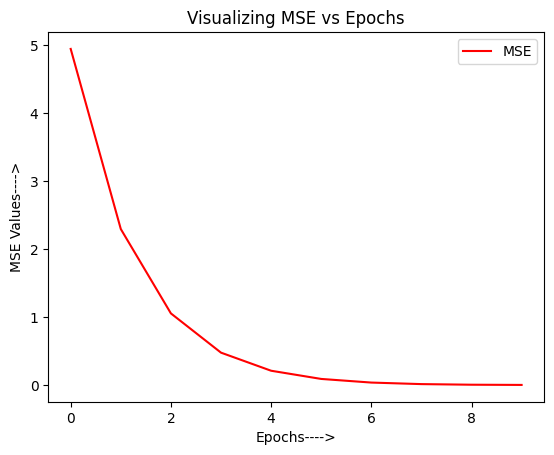

In [36]:
import matplotlib.pyplot as plt
plt.plot(MSE,label='MSE',color='red')
plt.xlabel("Epochs---->")
plt.ylabel("MSE Values---->")
plt.legend()

plt.title("Visualizing MSE vs Epochs")
plt.show()

In [38]:
mi

2.42231057406436

In [39]:
ci

2.71233373607053

In [41]:
y_pred=mi*x_test+ci
y_pred

,Bacteria_size
3,4.65018219532202


In [42]:
y_test

,Max_Growth
3,4.6
